### Las frecuencias de los tonos son: 19.51, 16.5 y 14 MHz. El noise_level está a 0.3

## Config

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [78]:
import seaborn as sns
sns.set(style="whitegrid")

plt.rc('text', usetex = False)
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font',   size      = SMALL_SIZE)   # controls default text sizes
plt.rc('axes',   titlesize = SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes',   labelsize = MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick',  labelsize = SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (7, 5)

In [79]:
def twos_complement(hexstr,bits):    
    value = int(hexstr,16)    
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

In [80]:
def get_data(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    imPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
        strIm = rawArray.iloc[i,3].split('h')[1]
        imPt[i] = twos_complement(strIm,nBits)
    return [t_us, realPt, imPt]

In [81]:
def fft(data, fs):
    vec = data[1] + 1j*data[2]
    fft = np.fft.fftshift(np.fft.fft(vec))
    freq = np.linspace(-fs/2, fs/2, len(fft))
    return [freq, fft]


## Input Data

In [82]:
dataIn = pd.read_table('tresTonosConRuido/dataIn.lst', sep=' ', skipinitialspace=True, skiprows=3, keep_default_na = False, header=None)

In [83]:
def get_data_real(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
    return [t_us, realPt]

In [84]:
dataInData = get_data_real(dataIn, 16)

(30000000000000.0, 30500000000000.0)

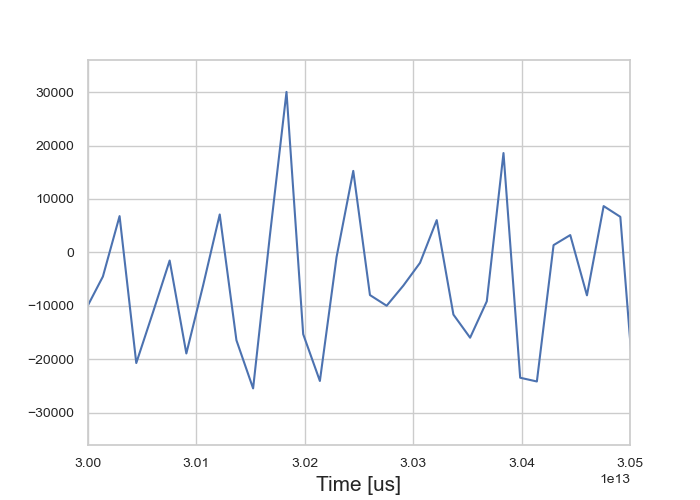

In [85]:
plt.figure()
plt.plot(dataInData[0]*1e6, dataInData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.05e13])

Text(0.5, 0, 'Frequency [MHz]')

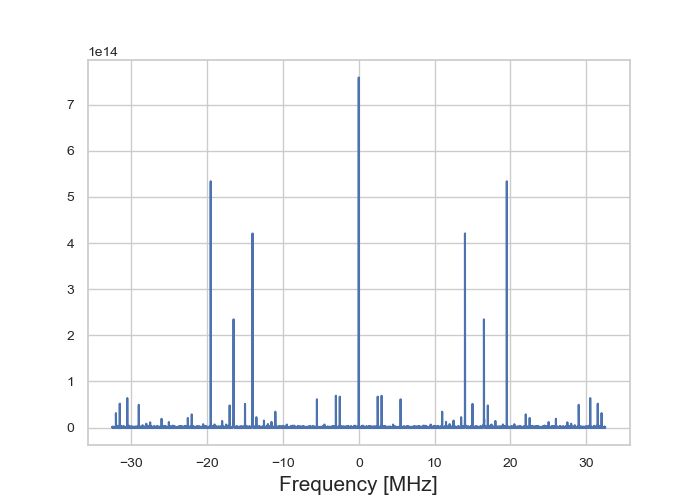

In [86]:
fftData = np.fft.fftshift(np.fft.fft(dataInData[1]))
fs = 65e6
freq = np.linspace(-fs/2, fs/2, len(fftData))
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData)**2)
plt.xlabel('Frequency [MHz]')


## Band Mixer

In [102]:
bandMixer = pd.read_table('tresTonosConRuido/bandMixer.lst', sep=' ', skipinitialspace=True, skiprows=4, keep_default_na = False, header=None)

In [103]:
bandMixerData = get_data(bandMixer, 16, 5000)

(30000000000000.0, 33000000000000.0)

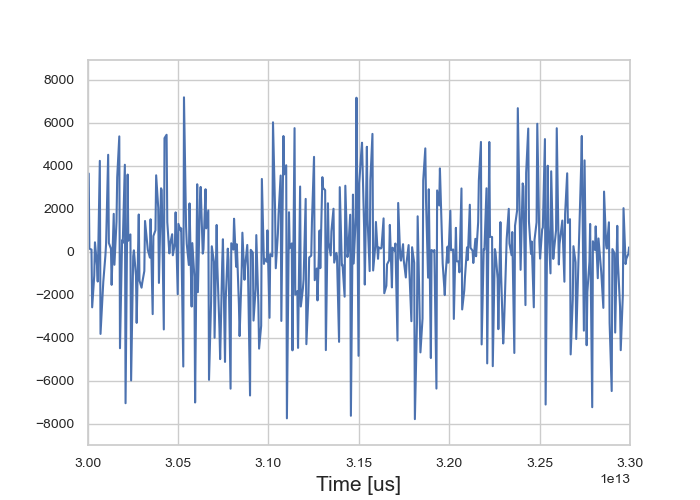

In [104]:
plt.figure()
plt.plot(bandMixerData[0]*1e6, bandMixerData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.3e13])


In [105]:
fs = 65e6
freq, fftData = fft(bandMixerData, fs)

Text(0.5, 0, 'Frequency [MHz]')

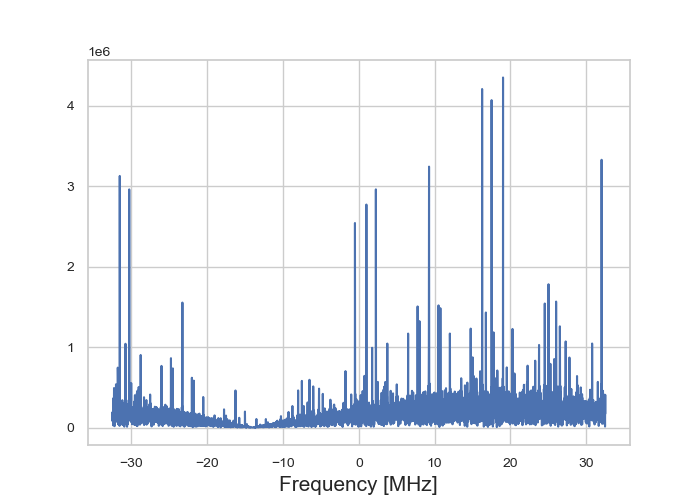

In [106]:
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData))
plt.xlabel('Frequency [MHz]')


## Band Filter

In [107]:
bandFilter = pd.read_table('tresTonosConRuido/bandFilter.lst', sep=' ', skipinitialspace=True, skiprows=2, keep_default_na = False, header=None)

In [108]:
bandFilterData = get_data(bandFilter, 16)

Text(0.5, 0, 'Time [us]')

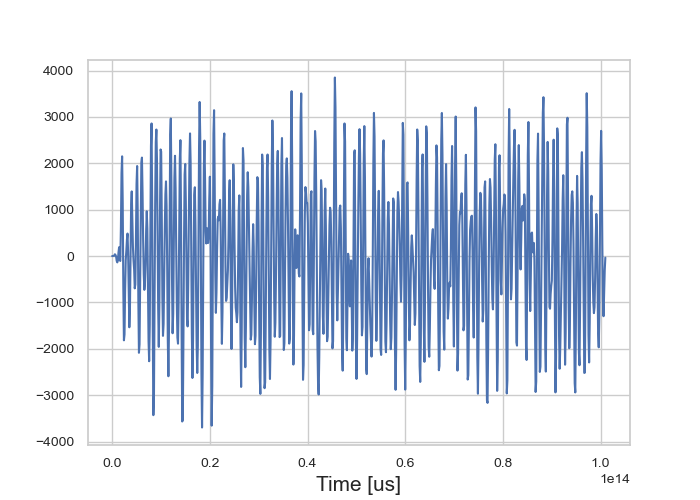

In [110]:
plt.figure()
plt.plot(bandFilterData[0]*1e6, bandFilterData[1])
plt.xlabel('Time [us]')
#plt.xlim([3e13,3.3e13])

In [111]:
fs = 8.125e6
freq, fftData = fft(bandFilterData, fs)

Text(0.5, 0, 'Frequency [MHz]')

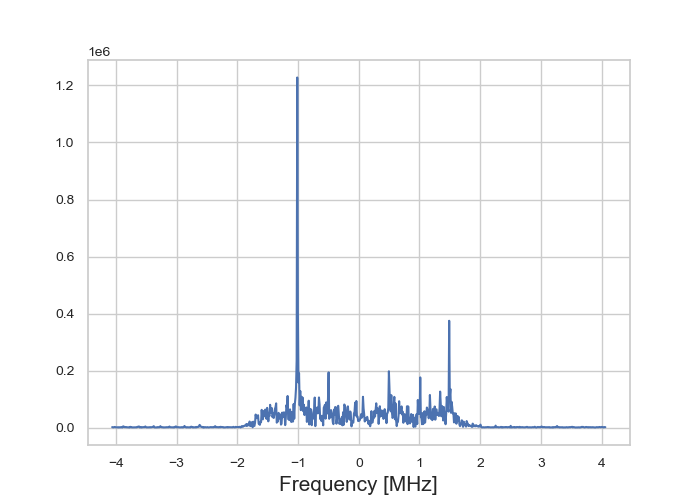

In [112]:
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData))
plt.xlabel('Frequency [MHz]')

## Channel Filter

In [118]:
channelFilter = pd.read_table('tresTonosConRuido/channelFilter.lst', sep=' ', skipinitialspace=True, skiprows=2, keep_default_na = False, header=None)

In [119]:
channelFilterData = get_data(channelFilter, 40)

Text(0.5, 0, 'Time [us]')

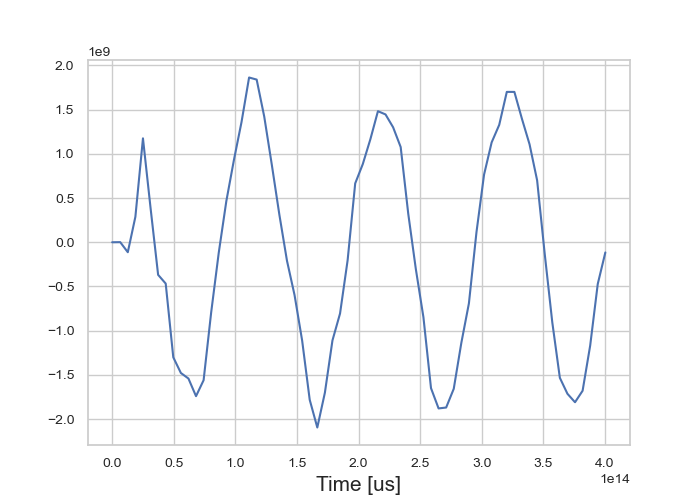

In [120]:
plt.figure()
plt.plot(channelFilterData[0]*1e6, channelFilterData[1])
plt.xlabel('Time [us]')
#plt.xlim([3e13,3.3e13])

In [121]:
fs = 162.5e3
freq, fftData = fft(channelFilterData, fs)

Text(0.5, 0, 'Frequency [MHz]')

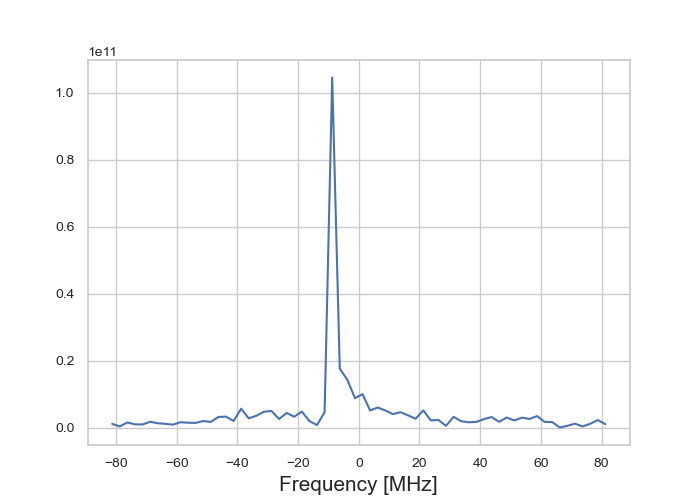

In [122]:
plt.figure()
plt.plot(freq*1e-3, np.abs(fftData))
plt.xlabel('Frequency [MHz]')